In [14]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe=pd.read_excel('./data/Concrete_Data.xls')
dataframe.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [15]:
dataframe["Blast Furnace Slag"]=dataframe["Blast Furnace Slag"]/dataframe["Cement"]*100
dataframe["Fly Ash"]=dataframe["Fly Ash"]/dataframe["Cement"]*100
dataframe["Water"]=dataframe["Water"]/dataframe["Cement"]*100
dataframe["Superplasticizer"]=dataframe["Superplasticizer"]/dataframe["Cement"]*100
dataframe["Coarse Aggregate"]=dataframe["Coarse Aggregate"]/dataframe["Cement"]*100
dataframe["Fine Aggregate"]=dataframe["Fine Aggregate"]/dataframe["Cement"]*100
dataframe["Cement"]=dataframe["Cement"].map(lambda x:x/x*100)
dataframe.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,100.0,0.000000,0.0,30.000000,0.462963,192.592593,125.185185,28,79.986111
1,100.0,0.000000,0.0,30.000000,0.462963,195.370370,125.185185,28,61.887366
2,100.0,42.857143,0.0,68.571429,0.000000,280.300752,178.646617,270,40.269535
3,100.0,42.857143,0.0,68.571429,0.000000,280.300752,178.646617,365,41.052780
4,100.0,66.666667,0.0,96.676737,0.000000,492.648540,415.659617,360,44.296075


Text(0.5, 1.0, '1立方米混凝土抗压强度与水泥含量之间的关系')

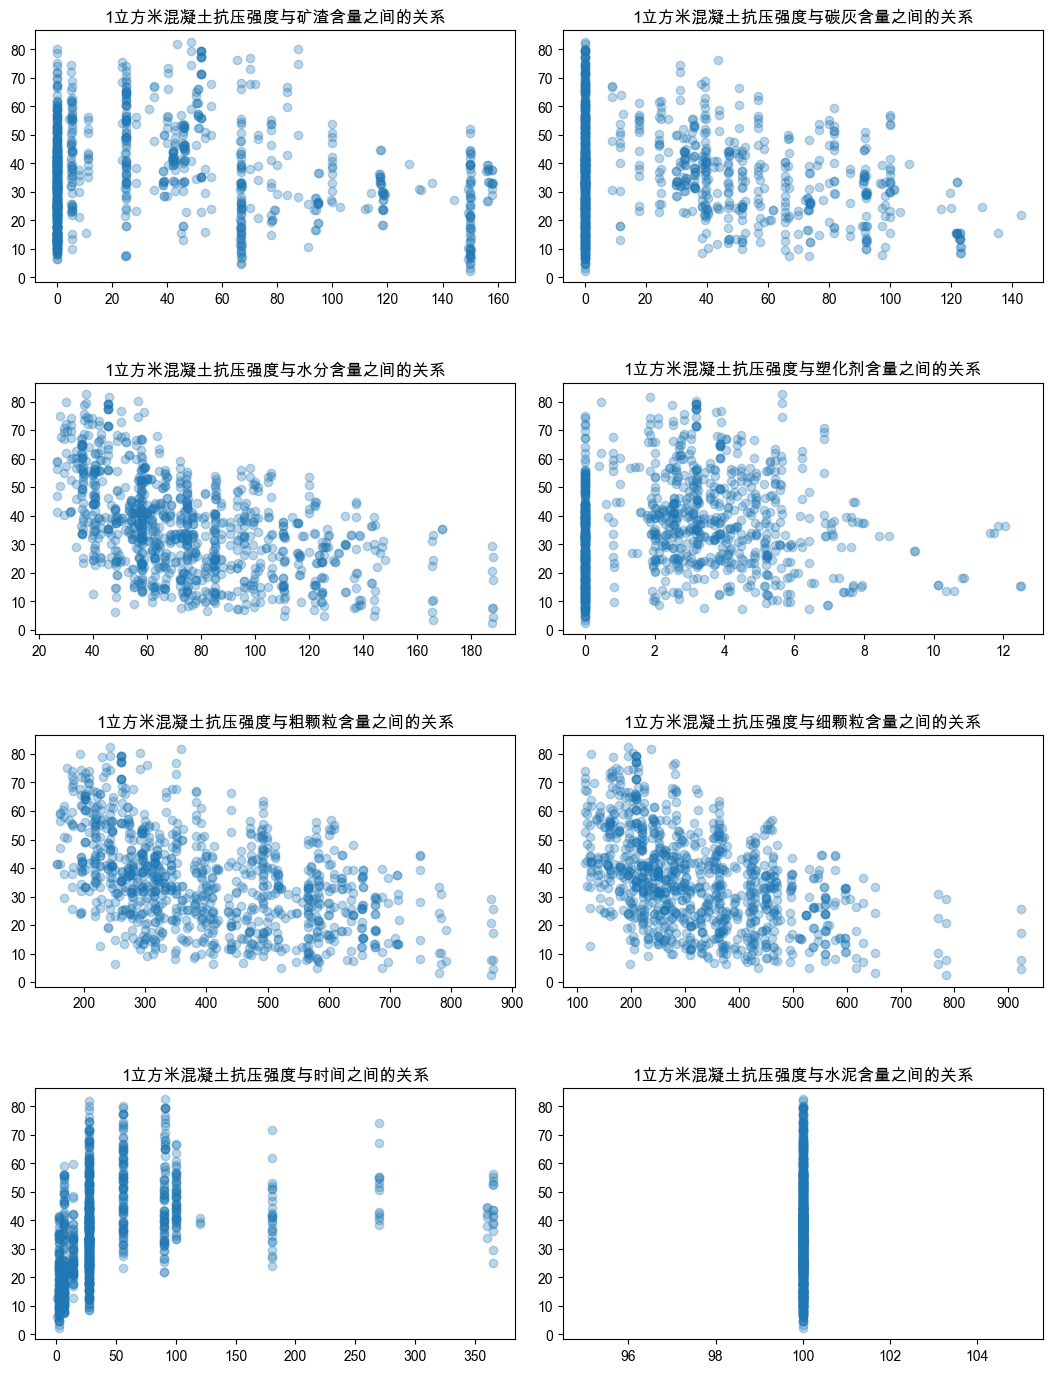

In [16]:
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif']=['Arial Unicode MS']
fig=plt.figure(figsize=(13,17))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
ax1=fig.add_subplot(421)
ax2=fig.add_subplot(422)
ax3=fig.add_subplot(423)
ax4=fig.add_subplot(424)
ax5=fig.add_subplot(425)
ax6=fig.add_subplot(426)
ax7=fig.add_subplot(427)
ax8=fig.add_subplot(428)
ax1.scatter(dataframe['Blast Furnace Slag'],dataframe['Concrete compressive strength'],alpha=0.3)
ax1.set_title('1立方米混凝土抗压强度与矿渣含量之间的关系')
ax2.scatter(dataframe['Fly Ash'],dataframe['Concrete compressive strength'],alpha=0.3)
ax2.set_title('1立方米混凝土抗压强度与碳灰含量之间的关系')
ax3.scatter(dataframe['Water'],dataframe['Concrete compressive strength'],alpha=0.3)
ax3.set_title('1立方米混凝土抗压强度与水分含量之间的关系')
ax4.scatter(dataframe['Superplasticizer'],dataframe['Concrete compressive strength'],alpha=0.3)
ax4.set_title('1立方米混凝土抗压强度与塑化剂含量之间的关系')
ax5.scatter(dataframe['Coarse Aggregate'],dataframe['Concrete compressive strength'],alpha=0.3)
ax5.set_title('1立方米混凝土抗压强度与粗颗粒含量之间的关系')
ax6.scatter(dataframe['Fine Aggregate'],dataframe['Concrete compressive strength'],alpha=0.3)
ax6.set_title('1立方米混凝土抗压强度与细颗粒含量之间的关系')
ax7.scatter(dataframe['Age'],dataframe['Concrete compressive strength'],alpha=0.3)
ax7.set_title('1立方米混凝土抗压强度与时间之间的关系')
ax8.scatter(dataframe['Cement'],dataframe['Concrete compressive strength'],alpha=0.3)
ax8.set_title('1立方米混凝土抗压强度与水泥含量之间的关系')

In [17]:
from sklearn.linear_model import LinearRegression
mul_LR_model=LinearRegression()

mul_LR_model.fit(dataframe[['Cement','Blast Furnace Slag','Fly Ash','Water',
                            'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']],
                dataframe['Concrete compressive strength'])
dataframe['预测值']=mul_LR_model.predict(dataframe[['Cement','Blast Furnace Slag','Fly Ash','Water',
                            'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']])
dataframe.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,预测值
0,100.0,0.000000,0.0,30.000000,0.462963,192.592593,125.185185,28,79.986111,44.461915
1,100.0,0.000000,0.0,30.000000,0.462963,195.370370,125.185185,28,61.887366,44.382840
2,100.0,42.857143,0.0,68.571429,0.000000,280.300752,178.646617,270,40.269535,57.832376
3,100.0,42.857143,0.0,68.571429,0.000000,280.300752,178.646617,365,41.052780,67.930947
4,100.0,66.666667,0.0,96.676737,0.000000,492.648540,415.659617,360,44.296075,59.408243


In [18]:
mul_score=mul_LR_model.score(dataframe[['Cement','Blast Furnace Slag','Fly Ash','Water',
                        'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']],
                            dataframe['Concrete compressive strength'])
mul_score

0.5697633777570603